In [1]:
import pandas as pd


## Connecting to TrueFx

In [ ]:
import urllib.request

In [ ]:
webUrl = urllib.request.urlopen('https://webrates.truefx.com/rates/connect.html')

In [ ]:
requestUrl = "https://webrates.truefx.com/rates/connect.html"

# Data set configuration

In [3]:
JanuaryData = pd.read_csv ('../HistoricalData/EurUsd/EURUSD-2023-01.csv')
FebruaryData = pd.read_csv('../HistoricalData/EurUsd/EURUSD-2023-02.csv')

In [4]:
JanuaryData

,EUR/USD,20230101 22:06:09.043,1.06946,1.07094
0,EUR/USD,20230101 22:10:00.185,1.06970,1.07095
1,EUR/USD,20230101 22:10:08.024,1.06848,1.07152
2,EUR/USD,20230101 22:10:09.040,1.06858,1.07152
3,EUR/USD,20230101 22:10:10.230,1.06970,1.07095
4,EUR/USD,20230101 22:10:12.796,1.06970,1.07157
...,...,...,...,...
8074219,EUR/USD,20230131 23:59:50.430,1.08606,1.08611
8074220,EUR/USD,20230131 23:59:54.042,1.08606,1.08612
8074221,EUR/USD,20230131 23:59:58.273,1.08602,1.08611
8074222,EUR/USD,20230131 23:59:59.577,1.08606,1.08612


In [5]:
JanuaryData.columns=['EUR/USD','timestamp','price','volume']
FebruaryData.columns=['EUR/USD','timestamp','price','volume']

In [6]:
JanuaryData

,EUR/USD,timestamp,price,volume
0,EUR/USD,20230101 22:10:00.185,1.06970,1.07095
1,EUR/USD,20230101 22:10:08.024,1.06848,1.07152
2,EUR/USD,20230101 22:10:09.040,1.06858,1.07152
3,EUR/USD,20230101 22:10:10.230,1.06970,1.07095
4,EUR/USD,20230101 22:10:12.796,1.06970,1.07157
...,...,...,...,...
8074219,EUR/USD,20230131 23:59:50.430,1.08606,1.08611
8074220,EUR/USD,20230131 23:59:54.042,1.08606,1.08612
8074221,EUR/USD,20230131 23:59:58.273,1.08602,1.08611
8074222,EUR/USD,20230131 23:59:59.577,1.08606,1.08612


In [38]:
# JanuaryData.set_index('timestamp',inplace=True)
# FebruaryData.set_index('timestamp',inplace=True)

In [116]:
JanuaryData['timestamp'] = pd.to_datetime(JanuaryData.timestamp,format='%Y-%m-%d %H:%M:%S.%f')



In [117]:
FebruaryData['timestamp'] = pd.to_datetime(FebruaryData.timestamp, format='%Y-%m-%d %H:%M:%S.%f')

In [119]:
FebruaryData

,EUR/USD,timestamp,price,volume
0,EUR/USD,2023-02-01 00:00:00.330,1.08601,1.08611
1,EUR/USD,2023-02-01 00:00:00.439,1.08606,1.08612
2,EUR/USD,2023-02-01 00:00:01.317,1.08606,1.08611
3,EUR/USD,2023-02-01 00:00:01.680,1.08606,1.08612
4,EUR/USD,2023-02-01 00:00:03.033,1.08606,1.08611
...,...,...,...,...
6955848,EUR/USD,2023-02-28 23:59:56.718,1.05762,1.05771
6955849,EUR/USD,2023-02-28 23:59:56.749,1.05765,1.05773
6955850,EUR/USD,2023-02-28 23:59:56.890,1.05763,1.05772
6955851,EUR/USD,2023-02-28 23:59:56.968,1.05765,1.05773


In [120]:
JanuaryData

,EUR/USD,timestamp,price,volume
0,EUR/USD,2023-01-01 22:10:00.185,1.06970,1.07095
1,EUR/USD,2023-01-01 22:10:08.024,1.06848,1.07152
2,EUR/USD,2023-01-01 22:10:09.040,1.06858,1.07152
3,EUR/USD,2023-01-01 22:10:10.230,1.06970,1.07095
4,EUR/USD,2023-01-01 22:10:12.796,1.06970,1.07157
...,...,...,...,...
8074219,EUR/USD,2023-01-31 23:59:50.430,1.08606,1.08611
8074220,EUR/USD,2023-01-31 23:59:54.042,1.08606,1.08612
8074221,EUR/USD,2023-01-31 23:59:58.273,1.08602,1.08611
8074222,EUR/USD,2023-01-31 23:59:59.577,1.08606,1.08612


In [125]:
appended_data = JanuaryData.append(FebruaryData)

C:\Users\evald\AppData\Local\Temp\ipykernel_32736\1710118668.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  appended_data = JanuaryData.append(FebruaryData)


In [126]:
appended_data

,EUR/USD,timestamp,price,volume
0,EUR/USD,2023-01-01 22:10:00.185,1.06970,1.07095
1,EUR/USD,2023-01-01 22:10:08.024,1.06848,1.07152
2,EUR/USD,2023-01-01 22:10:09.040,1.06858,1.07152
3,EUR/USD,2023-01-01 22:10:10.230,1.06970,1.07095
4,EUR/USD,2023-01-01 22:10:12.796,1.06970,1.07157
...,...,...,...,...
6955848,EUR/USD,2023-02-28 23:59:56.718,1.05762,1.05771
6955849,EUR/USD,2023-02-28 23:59:56.749,1.05765,1.05773
6955850,EUR/USD,2023-02-28 23:59:56.890,1.05763,1.05772
6955851,EUR/USD,2023-02-28 23:59:56.968,1.05765,1.05773


# Converting to currency data

In [145]:
resampledFrame = appended_data

In [147]:
resampledFrame

,EUR/USD,price,volume
timestamp,,,
2023-01-01 22:10:00.185,EUR/USD,1.06970,1.07095
2023-01-01 22:10:08.024,EUR/USD,1.06848,1.07152
2023-01-01 22:10:09.040,EUR/USD,1.06858,1.07152
2023-01-01 22:10:10.230,EUR/USD,1.06970,1.07095
2023-01-01 22:10:12.796,EUR/USD,1.06970,1.07157
...,...,...,...
2023-02-28 23:59:56.718,EUR/USD,1.05762,1.05771
2023-02-28 23:59:56.749,EUR/USD,1.05765,1.05773
2023-02-28 23:59:56.890,EUR/USD,1.05763,1.05772


In [148]:
# resampledFrame.set_index('timestamp',inplace=True)

KeyError: "None of ['timestamp'] are in the columns"

In [150]:
# Resample tick data to a higher frequency (e.g., 1 minute) using forward-fill method
df_resampled = resampledFrame.resample('5Sec')




Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\tslibs\offsets.pyx", line 3878, in pandas._libs.tslibs.offsets._get_offset
KeyError: 'SEC'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas\_libs\tslibs\offsets.pyx", line 3979, in pandas._libs.tslibs.offsets.to_offset
  File "pandas\_libs\tslibs\offsets.pyx", line 3884, in pandas._libs.tslibs.offsets._get_offset
ValueError: Invalid frequency: SEC

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\evald\PycharmProjects\WorkBookTests\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\evald\AppData\Local\Temp\ipykernel_32736\3843521063.py", line 2, in <module>
    df_resampled = resampledFrame.resample('5Sec')
  File "C:\Users\evald\PycharmProjects\WorkBookTests\venv\lib\site-packages\pandas\

In [ ]:
# Calculate open, high, low, close, and volume
df_resampled['open'] = df_resampled['price']
df_resampled['high'] = df_resampled['price'].rolling(window='1T').max()
df_resampled['low'] = df_resampled['price'].rolling(window='1T').min()
df_resampled['close'] = df_resampled['price']
df_resampled['volume'] = df_resampled['quantity']

In [ ]:
df_resampled

# testing

In [124]:
CurData

,EUR/USD,timestamp,price,volume


In [61]:
CurData.columns=['EUR/USD','timestamp','price','volume']

In [62]:
CurData

,EUR/USD,timestamp,price,volume
0,EUR/USD,20230101 22:10:00.185,1.06970,1.07095
1,EUR/USD,20230101 22:10:08.024,1.06848,1.07152
2,EUR/USD,20230101 22:10:09.040,1.06858,1.07152
3,EUR/USD,20230101 22:10:10.230,1.06970,1.07095
4,EUR/USD,20230101 22:10:12.796,1.06970,1.07157
...,...,...,...,...
8074219,EUR/USD,20230131 23:59:50.430,1.08606,1.08611
8074220,EUR/USD,20230131 23:59:54.042,1.08606,1.08612
8074221,EUR/USD,20230131 23:59:58.273,1.08602,1.08611
8074222,EUR/USD,20230131 23:59:59.577,1.08606,1.08612


In [63]:
CurData.set_index('timestamp',inplace=True)

In [64]:
CurData

,EUR/USD,price,volume
timestamp,,,
20230101 22:10:00.185,EUR/USD,1.06970,1.07095
20230101 22:10:08.024,EUR/USD,1.06848,1.07152
20230101 22:10:09.040,EUR/USD,1.06858,1.07152
20230101 22:10:10.230,EUR/USD,1.06970,1.07095
20230101 22:10:12.796,EUR/USD,1.06970,1.07157
...,...,...,...
20230131 23:59:50.430,EUR/USD,1.08606,1.08611
20230131 23:59:54.042,EUR/USD,1.08606,1.08612
20230131 23:59:58.273,EUR/USD,1.08602,1.08611


In [127]:
allNullVal = pd.DataFrame()

In [128]:
allNullVal = CurData.isnull()

In [129]:
nullRows = allNullVal.isnull().sum()
nullRows

EUR/USD      0.0
timestamp    0.0
price        0.0
volume       0.0
dtype: float64

In [69]:
CurData

,EUR/USD,price,volume
timestamp,,,
2023-01-01 22:10:00.185,EUR/USD,1.06970,1.07095
2023-01-01 22:10:08.024,EUR/USD,1.06848,1.07152
2023-01-01 22:10:09.040,EUR/USD,1.06858,1.07152
2023-01-01 22:10:10.230,EUR/USD,1.06970,1.07095
2023-01-01 22:10:12.796,EUR/USD,1.06970,1.07157
...,...,...,...
2023-01-31 23:59:50.430,EUR/USD,1.08606,1.08611
2023-01-31 23:59:54.042,EUR/USD,1.08606,1.08612
2023-01-31 23:59:58.273,EUR/USD,1.08602,1.08611


In [70]:
# # Example timestamp
# # Convert to DatetimeIndex
# datetime_index = pd.to_datetime(CurData.index, format='%Y%m%d %H:%M:%S.%f')
#
# print('DatetimeIndex:', datetime_index)

DatetimeIndex: DatetimeIndex(['2023-01-01 22:10:00.185000', '2023-01-01 22:10:08.024000',
               '2023-01-01 22:10:09.040000', '2023-01-01 22:10:10.230000',
               '2023-01-01 22:10:12.796000', '2023-01-01 22:10:13.109000',
               '2023-01-01 22:10:13.440000', '2023-01-01 22:10:13.895000',
               '2023-01-01 22:10:13.895000', '2023-01-01 22:10:14.114000',
               ...
               '2023-01-31 23:59:50.082000', '2023-01-31 23:59:50.098000',
               '2023-01-31 23:59:50.161000', '2023-01-31 23:59:50.192000',
               '2023-01-31 23:59:50.368000', '2023-01-31 23:59:50.430000',
               '2023-01-31 23:59:54.042000', '2023-01-31 23:59:58.273000',
               '2023-01-31 23:59:59.577000', '2023-01-31 23:59:59.627000'],
              dtype='datetime64[ns]', name='timestamp', length=8074224, freq=None)


In [143]:
CurData

,EUR/USD,price,volume
timestamp,,,
2023-01-01 22:10:00.185,EUR/USD,1.06970,1.07095
2023-01-01 22:10:08.024,EUR/USD,1.06848,1.07152
2023-01-01 22:10:09.040,EUR/USD,1.06858,1.07152
2023-01-01 22:10:10.230,EUR/USD,1.06970,1.07095
2023-01-01 22:10:12.796,EUR/USD,1.06970,1.07157
...,...,...,...
2023-01-31 23:59:50.430,EUR/USD,1.08606,1.08611
2023-01-31 23:59:54.042,EUR/USD,1.08606,1.08612
2023-01-31 23:59:58.273,EUR/USD,1.08602,1.08611


## Resample to making in timeFrames(1sec,5sec...)

In [139]:
# Resample tick data into OHLC intervals
ohlc_data = CurData.resample('5Min')
volume_data = CurData['volume'].resample('5Min').sum()

In [140]:
volume_data

timestamp
2023-01-01 22:10:00    154.30780
2023-01-01 22:15:00     39.65653
2023-01-01 22:20:00     11.79304
2023-01-01 22:25:00      9.65325
2023-01-01 22:30:00     51.49225
                         ...    
2023-01-31 23:35:00    389.95386
2023-01-31 23:40:00    225.93020
2023-01-31 23:45:00    185.73766
2023-01-31 23:50:00    279.16485
2023-01-31 23:55:00    245.46918
Freq: 5T, Name: volume, Length: 8662, dtype: float64

In [141]:
countNull = (volume_data == 0).sum()

In [142]:
countNull

2595

In [88]:
sampler = CurData.index.ohlc()

AttributeError: 'DatetimeIndex' object has no attribute 'ohlc'

In [82]:
# Flatten column names
ohlc_data.columns = ['_'.join(col) for col in ohlc_data.columns]
ohlc_data.drop(columns=['price'], inplace=True)

AttributeError: 'DatetimeIndexResampler' object has no attribute 'columns'

In [85]:
# Merge OHLC and volume data
merged_data = pd.concat([ohlc_data, volume_data], axis=1)

TypeError: cannot concatenate object of type '<class 'pandas.core.resample.DatetimeIndexResampler'>'; only Series and DataFrame objs are valid

# Backtesting config

In [27]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(GOOG, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

C:\Users\evald\PycharmProjects\WorkBookTests\venv\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\evald\PycharmProjects\WorkBookTests\venv\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p4897', ...)

In [12]:
cvs_data_default = GOOG
GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


In [6]:
import backtesting

In [25]:

# Define your trading strategy
class moving_average_crossover(Strategy):
    params = (('short_window', 20), ('long_window', 50))

    def __init__(self):
        self.short_ma = bt.ind.SMA(self.data, period=self.params.short_window)
        self.long_ma = bt.ind.SMA(self.data, period=self.params.long_window)
        self.crossover = bt.ind.CrossOver(self.short_ma, self.long_ma)

    def next(self):
        if not self.position:  # if not in a position
            if self.crossover > 0:  # if short MA crosses above long MA
                self.buy()  # generate a buy signal
        elif self.crossover < 0:  # if short MA crosses below long MA
            self.close()  # generate a sell signal

# Load historical data
data = pd.read_csv('dt/EurUsd/EURUSD-2023-01.csv')

# Create a backtest object

bt = Backtest(GOOG, moving_average_crossover,
              cash=10000, commission=.002,
              exclusive_orders=True)


In [26]:
output = bt.run()
bt.plot()

TypeError: Can't instantiate abstract class Strategy with abstract methods init, next

In [3]:
# api = Metatrader(host="172.17.0.2",tz_local=True)

NotDone: Sending request ERROR

In [4]:
# api = Metatrader()

NotDone: Data socket timeout ERROR

In [ ]:
# accountInfo = api.accountInfo()
# accountInfo

In [ ]:
# api = Metatrader(host="145.93.120.219" ,tz_local=True)

# Data Visualization

In [72]:
import matplotlib
import matplotlib.pyplot as plt

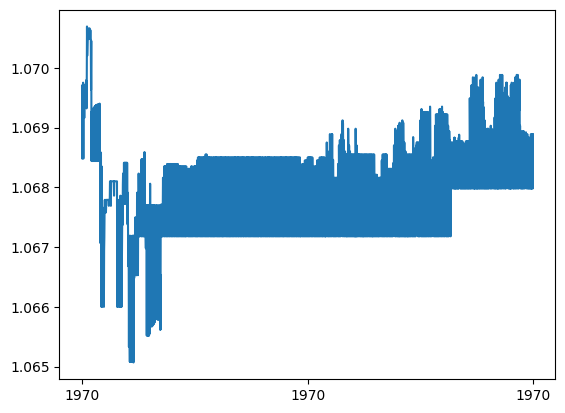

In [84]:
matplotlib.pyplot.plot(JanuaryData.timestamp.head(2000),JanuaryData.price.head(2000))

KeyboardInterrupt: 

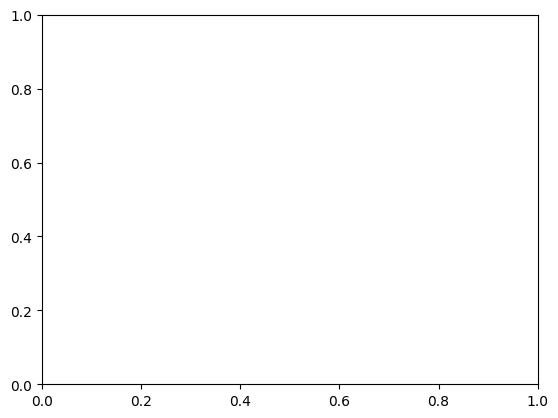

In [77]:
matplotlib.pyplot.plot(JanuaryData.timestamp.head(20),JanuaryData.price.head(20))